<img src="./logo_UTN.svg" align="right" width="200" /> 

#### Teoría de los Circuitos 2

# Trabajo semanal 4 Bis2 - Colaborativo

#### Por Ana Nuñez y Santiago Palozzo


# Consigna

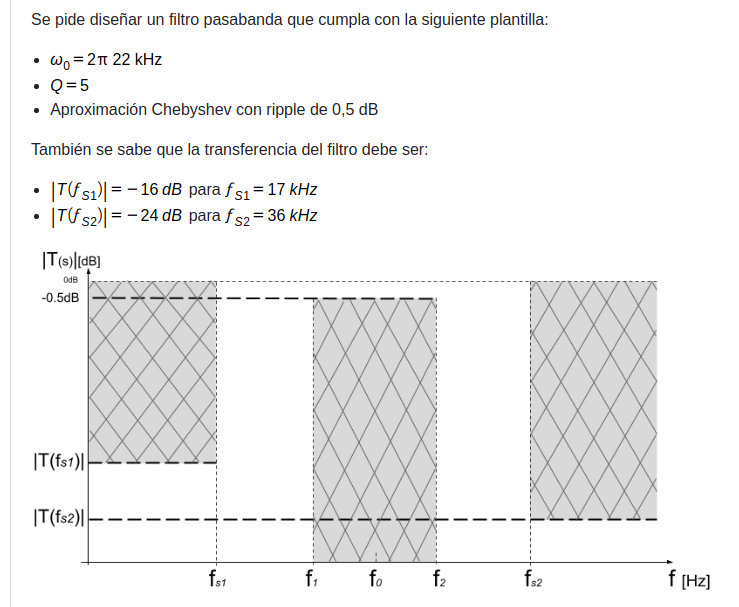

👉  Obtener la plantilla de diseño pasabanda normalizada

👉  Obtener la función transferencia normalizada del prototipo pasabajo que satisfaga el requerimiento del filtro pasabanda.

👉  Obtener la transferencia pasabanda normalizada

👉  Implementar mediante secciones pasivas separadas por seguidores de tensión activos.

👉  Activar las redes pasivas mediante la red propuesta aquí debajo y comprobar mediante simulación el comportamiento deseado.

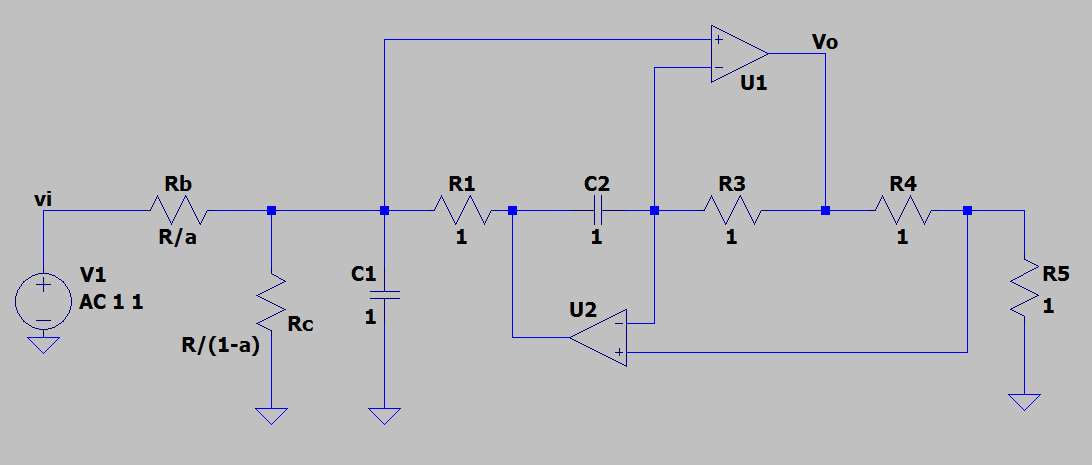

# Distribución y organización del trabajo

Dado que ambos estabamos al día con la materia, adoptamos la modalidad de "Trabajo complementario". Consideramos que lo mejor sería realizar el desarrollo por separado, a modo de práctica, y luego ponerlo en común para discutir los resultados y problemas que surgieran en el transcurso de la resolución. 



# 1. Desarrollo analítico

A continuacíon se adjuntan ambos desarrollos, primero el de Santiago Palozzo, el cual es puramente analítico, y luego el de Ana Nuñez, acompañado de una simulación en Python

In [1]:
from IPython.display import IFrame
IFrame("./desarrollo.pdf", width=1000, height=1000)

In [2]:
from IPython.display import IFrame
IFrame("./TS4_Bis2.pdf", width=1000, height=1000)

# 2. Simulación numérica circuital

HLP(s): 


<IPython.core.display.Math object>

HBP(s): 


<IPython.core.display.Math object>

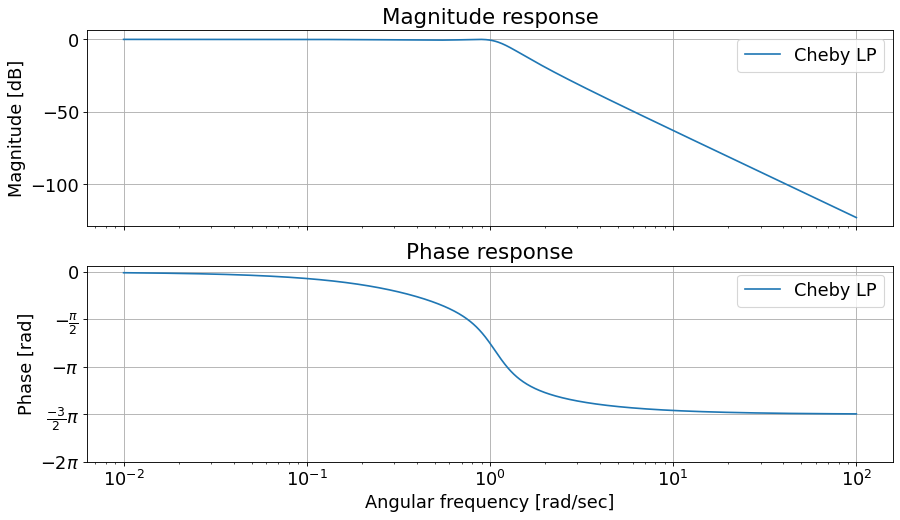

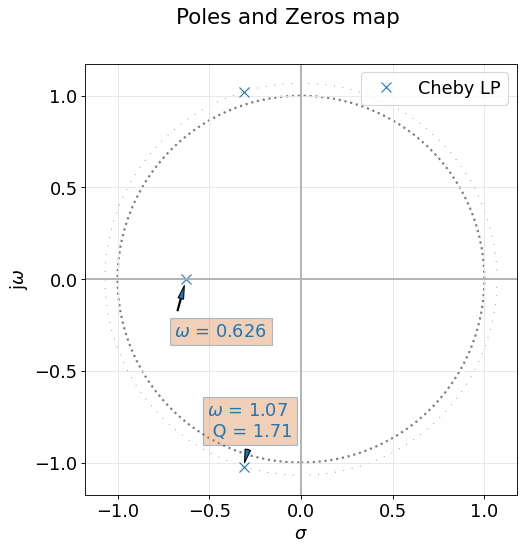

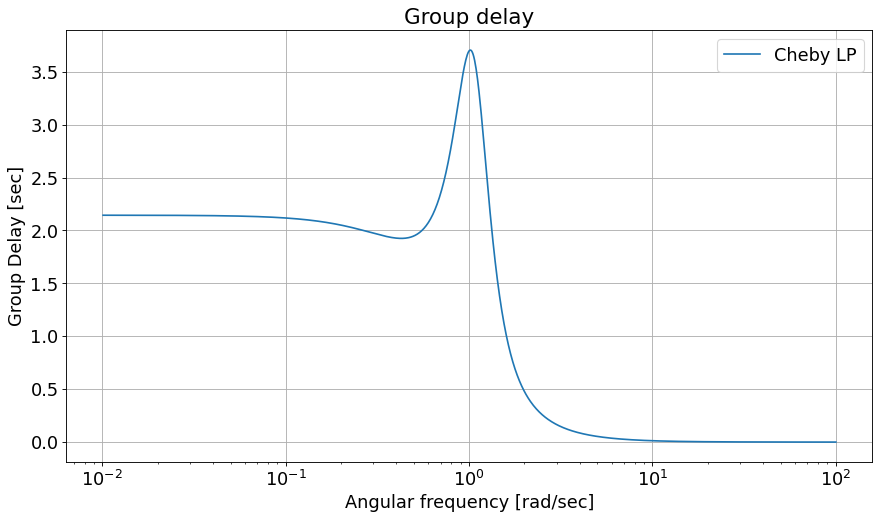

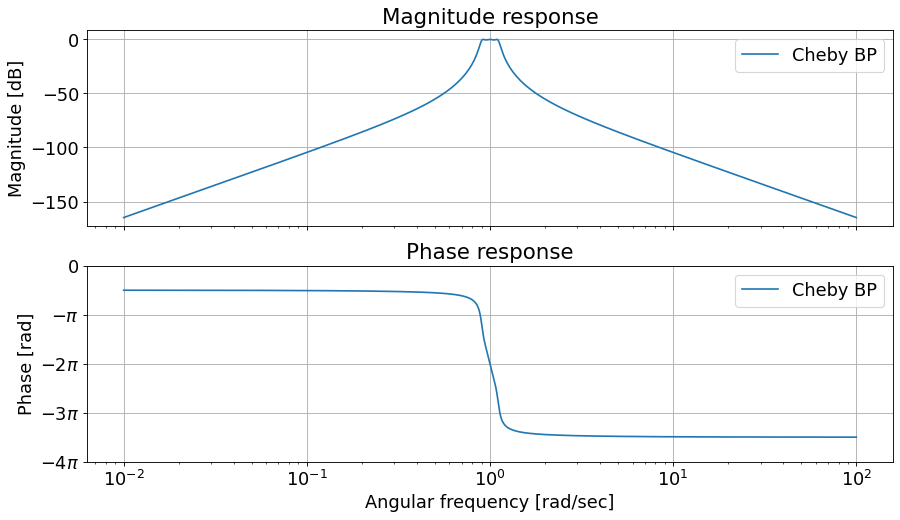

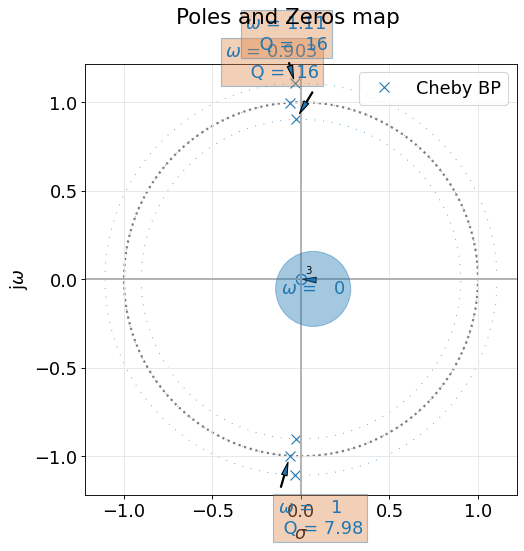

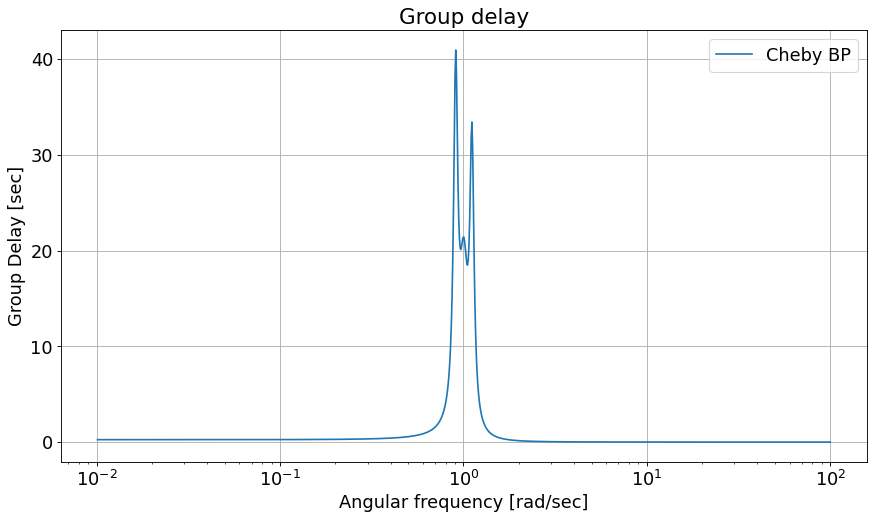

In [5]:
#%% Inicializacion de graficos para el Notebook
plt.figure(1)
plt.close(1)

import matplotlib as mpl

fig_sz_x = 13
fig_sz_y = 7
fig_dpi = 80 # dpi
fig_font_size = 16

mpl.rcParams['figure.figsize'] = (fig_sz_x, fig_sz_y)
mpl.rcParams['figure.dpi'] = fig_dpi
plt.rcParams.update({'font.size':fig_font_size})
#%%  Fin - Inicialización de librerías

from scipy.signal import TransferFunction
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as ss

from pytc2.sistemas_lineales import analyze_sys, pretty_print_bicuad_omegayq, tf2sos_analog, pretty_print_SOS


#----------------------Definicion de las variables---------------------

xi = 0.35
n = 3
rp = 0.5

#---------------------------Definicion de HLP--------------------------

[zLP, pLP, kLP] = ss.cheb1ap(n, rp)

[numLP, denLP] = ss.zpk2tf(zLP, pLP, kLP)

LP_sos = tf2sos_analog(numLP, denLP)

HLP = TransferFunction(numLP, denLP)

#-------------------------Transformación LP-BP-------------------------

[numBP, denBP] = ss.lp2bp(numLP, denLP, 1, 1/5)

[zBP, pBP, kBP] = ss.tf2zpk(numBP, denBP)

BP_sos = tf2sos_analog(numBP, denBP)

HBP = TransferFunction(numBP, denBP)

#-----------------------------Visualizacion----------------------------

# -------- LP --------
print("HLP(s): ")
pretty_print_SOS(LP_sos, mode='omegayq')
#print("zLP = ", zLP, "\n", "pLP = ", pLP, "\n", "kLP =", kLP)
analyze_sys(HLP, "Cheby LP")

#print("\n")

# -------- BP --------
print("HBP(s): ")
pretty_print_SOS(BP_sos, mode='omegayq')
#print("zBP = ", zBP, "\n", "pBP = ", pBP, "\n", "kBP =", kBP)
analyze_sys(HBP, "Cheby BP", same_figs=False)


En los graficos resultantes del script de Python se puede observar como se empieza el diseño por un prototipo Chebyshev pasabajos y este luego se transforma en el dominio de la frecuencia para lograr el pasabanda objetivo. Al mismo tiempo se observa como tiene ganancia de 0dB en la banda de paso que esta centrada en $\omega_0=1$ normalizada. Esto se logra mediante la compensacion de ganancias entre las SOS que componen la transferencia pasabanda.

# 3. Implementación pasiva 

A la hora de realizar la implementación pasiva, surgió la dificultad de lograr las ganancias requeridas para cada seccion del filtro, ya que en una implementación pasiva pura unicamente se podría atenuar. Es por eso que decidimos plantearlo sin ningun tipo de ganancia.

### Simulación del circuito en LTSpice pasivo

Se realizó la simulación en LTSpice para corroborar los resultados obtenidos. A continuación se muestran el circuito y su transferencia. 

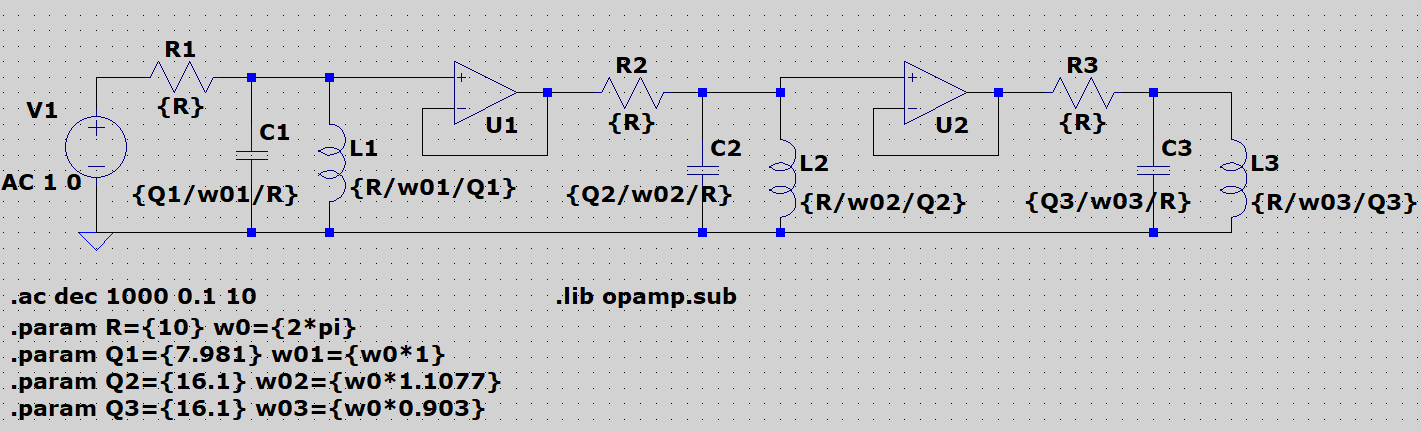

Es importante notar que la simulacion se realizo de tal forma que en el eje X de LTspice 1 Hz coincide con lo que sería $1\frac{rad}{s}$

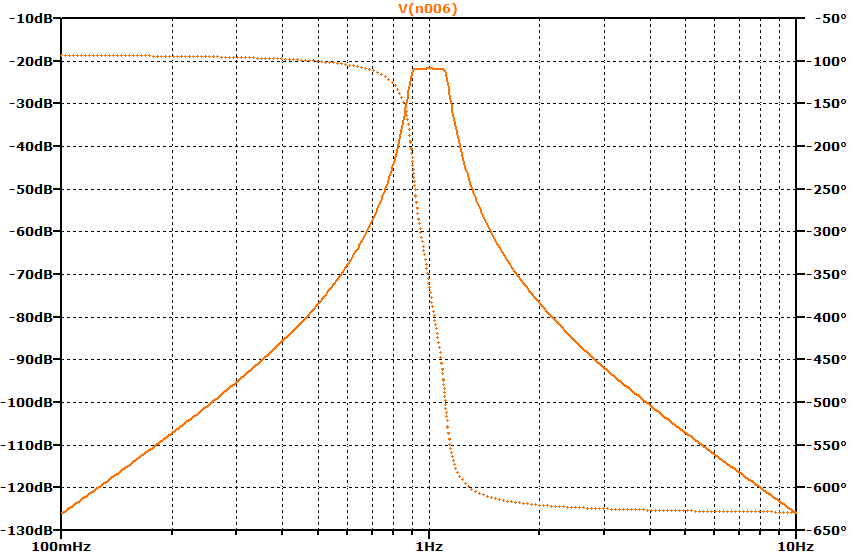

A simple vista se observa que el filtro obtenido a partir de un circuito puramente pasivo no tiene 0dB en la banda de paso ya que las secciones pasabandas no pueden amplificar.

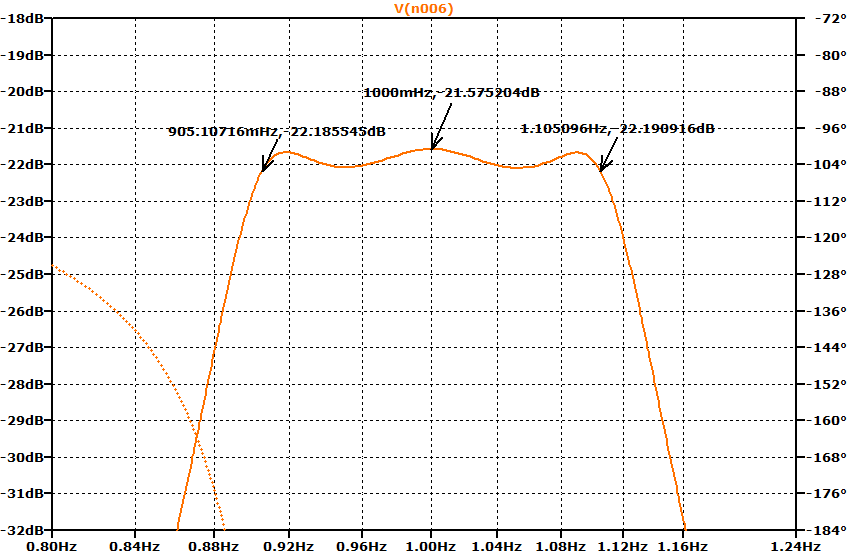

Tambien se observa que se mantiene el ancho de banda del filtro, respetando las frecuencias de corte normalizadas $\omega_{ci} = 0.905$ y $\omega_{cs} = 1.105$

# 4. Simulación en LTSpice del circuito activo

Para hacer la simulación activa, se propuso un a = 0.6035 para cumplir con la $K_{H1} = 1.205$ 

Sin embargo, $K_{H2} \wedge K_{H3} > 2$ por lo tanto no se podria implementar de la misma manera que $K_{H1}$, se propuso un b = 0.5 tal que la ganancia de H2(s) y H3(s) sea 0dB y se colocó un ampificador a la salida para que gane 9.75 veces

A continuación, se muestran el circuito activo y su transferencia

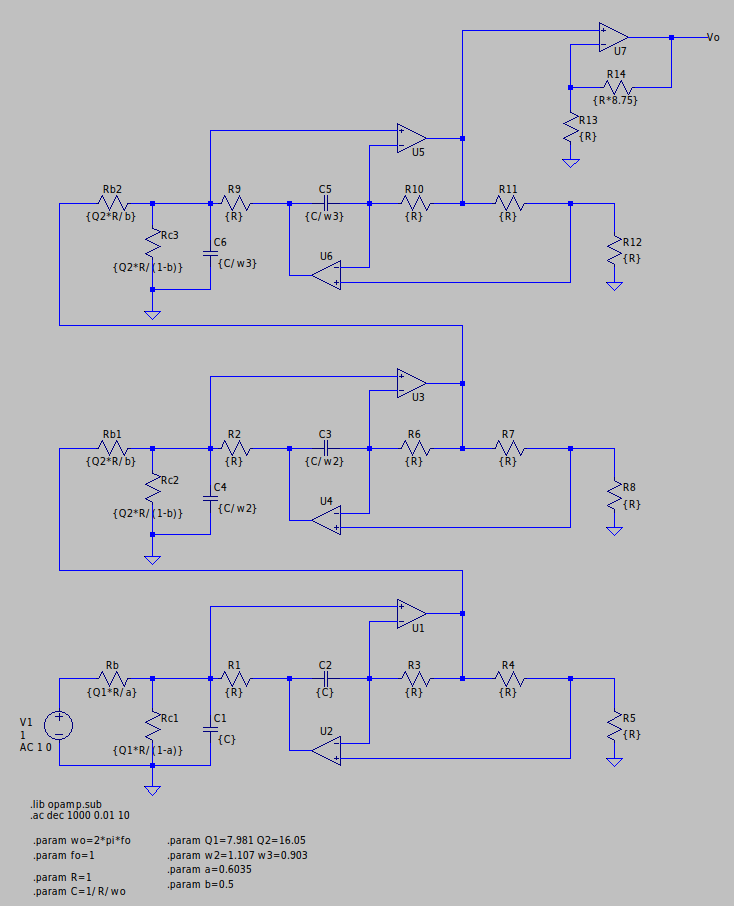 

Al igual que en la implementación pasiva, la simulacion se realizo de tal forma que en el eje X de LTspice 1 Hz coincida con  $1\frac{rad}{s}$

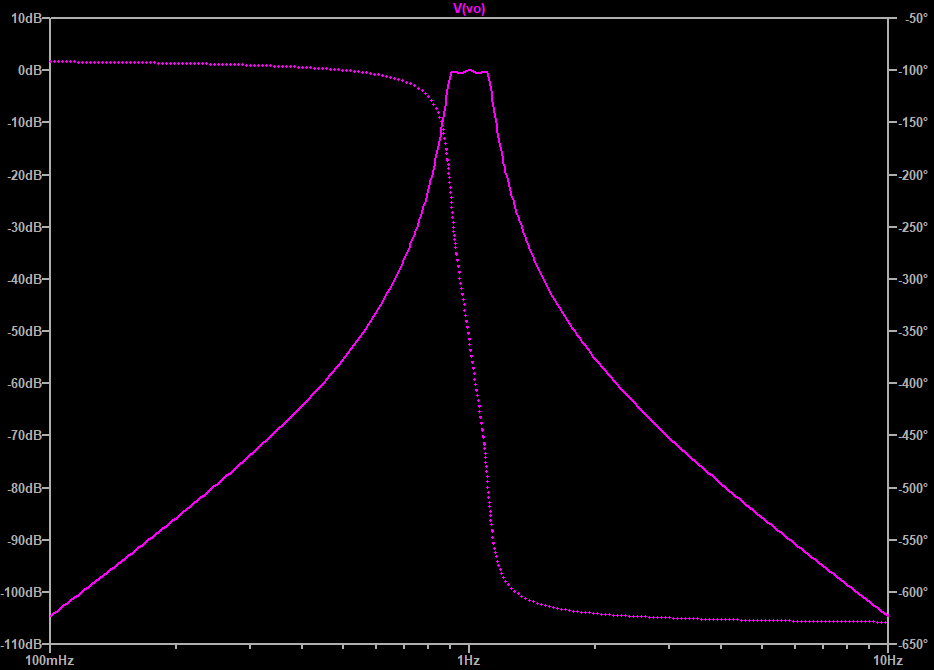

Se le hace zoom a la transferencia para analizar el comportamiento en $\omega_{p1}$ y $\omega_{p2}$, señalizadas con los cursores

$|T(\omega = \omega_{p1})| = -0.4695dB$, verifica que $\alpha_{max} < 0.5dB$ 

$|T(\omega = \omega_{p2})| = -0.4905dB$,  verifica que $\alpha_{max} < 0.5dB$ 

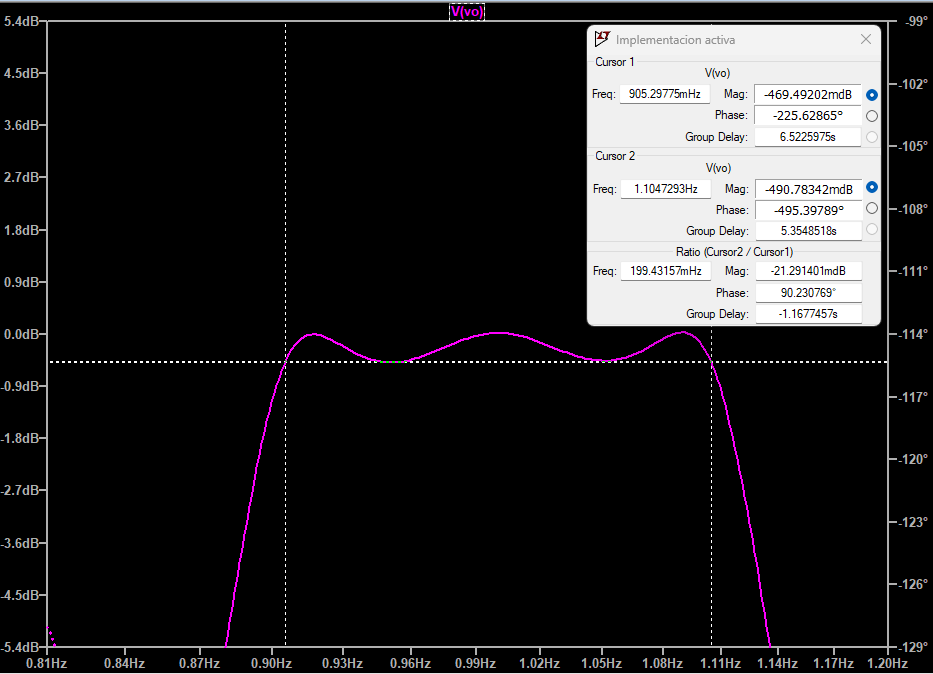

Se repite el procedimiento para $\omega_{s1}$ y $\omega_{s2}$

$|T(\omega = \omega_{s1})| = -26.9dB$,  verifica que $\alpha_{min} > 24db$

$|T(\omega = \omega_{s2})| = -44.7dB$,  verifica que $\alpha_{min} > 24db$

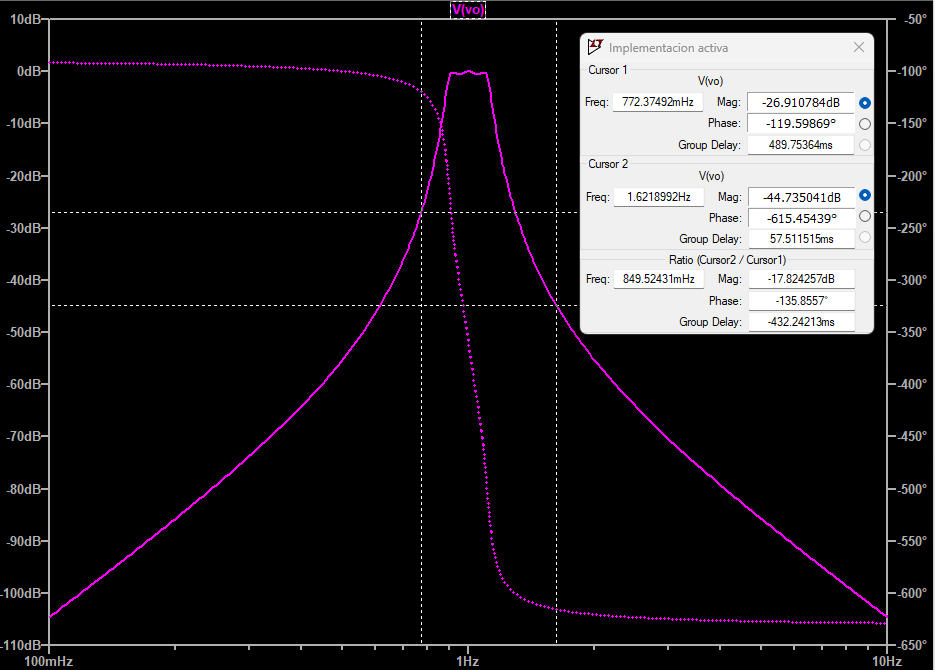

### Circuito activo sin amplificador

Otra alternativa, es modificar las resistencias de los giradores para variar la ganancia del circuito. De acuerdo a lo calculado, la transferencia tendrá una ganancia de 2, al variar R3, R4 y R5 podemos mantener la estructura de la tranferencia y variar su ganacia. 

Para H2(s), por ejemplo, propusimos R5 = R, luego, para que tenga una ganancia de 3, seleccionamos R4 = 2R, y por último para mantener la transferencia, R3 = R4 = 2R. Sin embargo, H2(s) debía tener una $K_{H2} = 2.045$, por lo que b = 0.684

Para H3(s), R5 = R, y para lograr una ganancia de 5, R4 = R3 = 4R. Finalmente, d = 0.957 y $K_{H3} = 4.768$

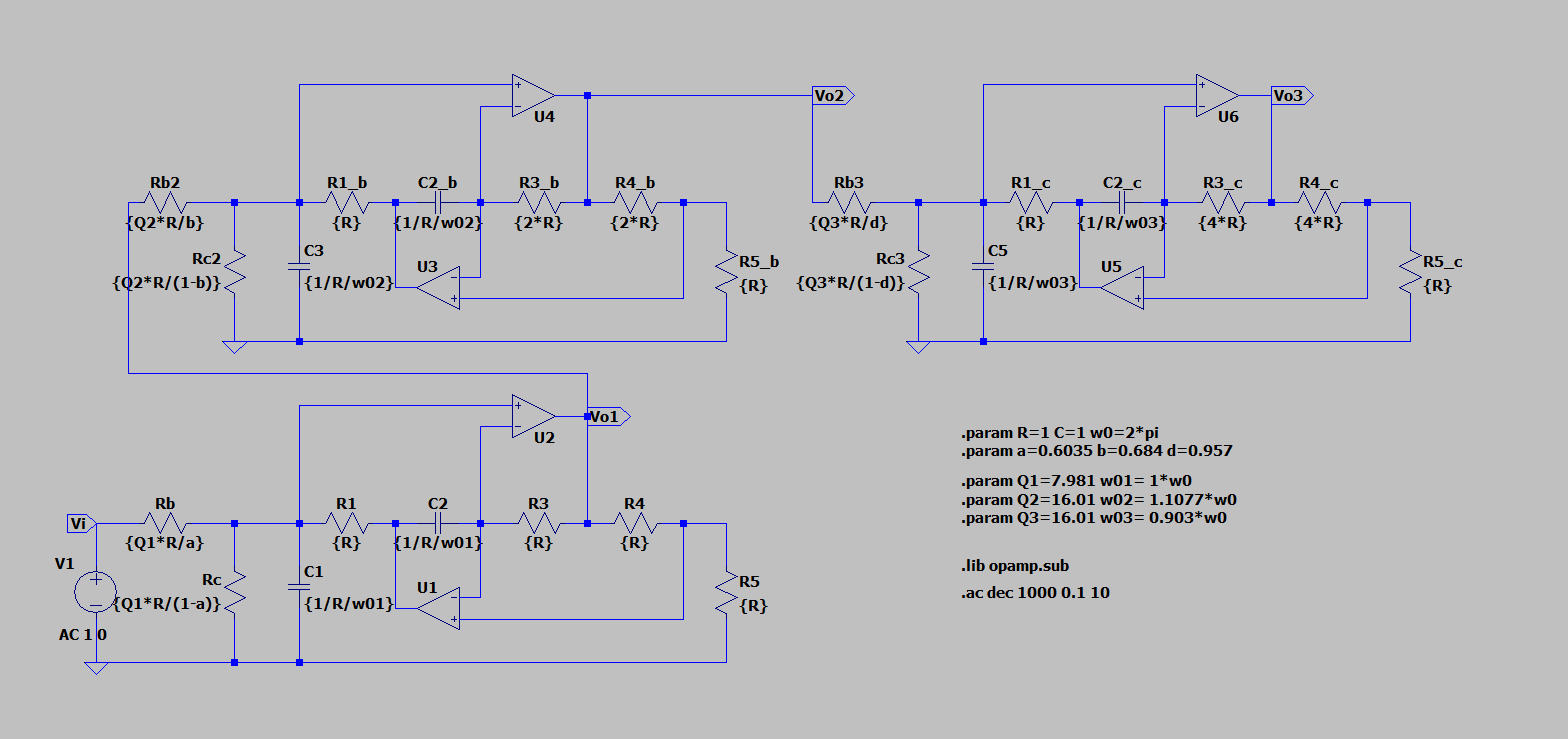

Se corrobora que la transferencia coincida con la simulada anteriormente

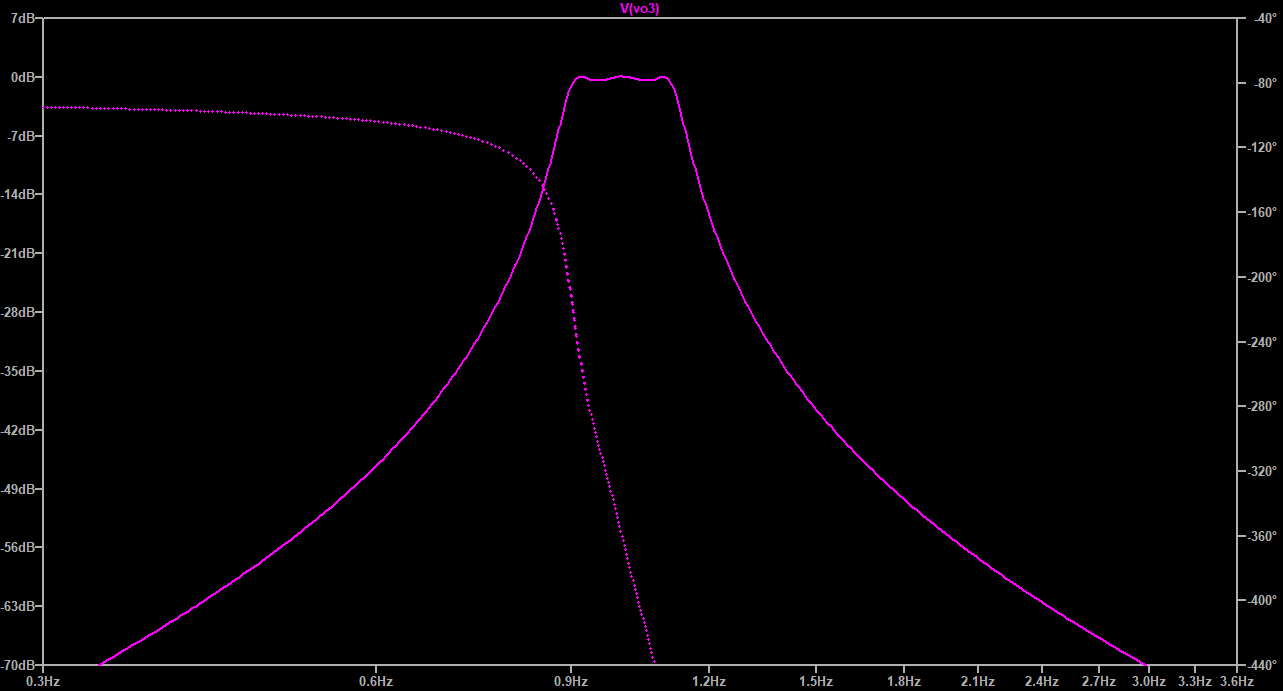

# 5. Conclusiones

- Se observa como mediante el método sistemático de la transformación en frecuencia se pueden diseñar todo tipo de filtros facilmente partiendo de prototipos pasabajo. Sin embargo esto tiene ciertas limitaciones, como que el filtro debe ser simétrico. 
- Se visualiza que como la plantilla original no es simétrica, el filtro cumplirá con las especificaciones mas estrictas del diseño, y entonces el orden del filtro esta determinado por las condiciones que impone la banda mas exigente.
- Se comprueba que las funciones de aproximación provistas por Python se verifican haciendo el desarrollo del diseño en papel y aplicando el núcleo de transformación a mano.
- Se destaca que para implementar un filtro pasabanda de manera correcta es necesario utilizar componentes activos. De lo contrario la banda de paso no tendrá la ganancia requerida.
- Se observa que modificando los componentes del GIC podemos variar la ganancia, lo cual es muy util en el diseño de un filtro pasabanada, ya que al poner varios filtros en cascada, pueden compensarse entre si las ganancias de las diferentes secciones para lograr una ganancia de 0dB en la banda de paso.
- Se corrobora que la transferencia no cambia si se altera la ganancia del GIC o si se agrega un amplificador en la etapa de salida.